In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import array
from numpy import hstack

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1.Reading & Merging data

In [0]:
import time
from time import mktime
from datetime import datetime

In [0]:
pip install dateparser

     |████████████████████████████████| 358kB 2.8MB/s 


In [0]:
import dateparser

## 1.1 Reading data

### 1.1.1 Reading rt prices

In [0]:
rt_prices = pd.read_csv("gdrive/My Drive/Deep learning/rt_prices.csv", parse_dates=['dates'])
rt_prices

,dates,SMECO_RESID_AGG..RTLMP..Average,DOM_RESID_AGG..RTLMP..Average,AEPKY_RESID_AGG..RTLMP..Average
0,2018-01-28 01:00:00,22.02,21.98,21.98
1,2018-01-28 02:00:00,21.68,21.64,21.66
2,2018-01-28 03:00:00,21.13,21.12,21.21
3,2018-01-28 04:00:00,21.22,21.23,21.39
4,2018-01-28 05:00:00,21.74,21.77,21.93
...,...,...,...,...
16866,2019-12-31 20:00:00,19.15,18.98,19.38
16867,2019-12-31 21:00:00,18.96,18.99,19.55
16868,2019-12-31 22:00:00,18.65,18.74,19.38
16869,2019-12-31 23:00:00,18.18,18.17,18.47


### 1.1.2 Reading dam prices

In [0]:
dam_prices = pd.read_csv("gdrive/My Drive/Deep learning/dam_prices.csv", parse_dates=['dates'])
dam_prices

,dates,SMECO_RESID_AGG..DALMP..Average,DOM_RESID_AGG..DALMP..Average,AEPKY_RESID_AGG..DALMP..Average
0,2018-01-28 01:00:00,23.49,23.33,22.60
1,2018-01-28 02:00:00,22.85,22.73,22.17
2,2018-01-28 03:00:00,22.27,22.24,21.74
3,2018-01-28 04:00:00,22.30,22.28,21.78
4,2018-01-28 05:00:00,22.44,22.43,21.95
...,...,...,...,...
16866,2019-12-31 20:00:00,27.82,27.08,27.06
16867,2019-12-31 21:00:00,25.08,24.52,24.86
16868,2019-12-31 22:00:00,23.28,22.69,22.99
16869,2019-12-31 23:00:00,20.30,19.85,20.27


### 1.1.3 Reading features data

In [0]:
feature = pd.read_csv("gdrive/My Drive/Deep learning/features.csv", parse_dates=['dates'])
feature['indice']=feature.index
feature

,dates,Gas.price,MidAtl_Pool_pr,western_Pool_prev,Total_Pool_prev,Percent.diff.MidAtl_Pool_pr,Percent.diff.western_Pool_prev,Percent.diff.Total_Pool_prev,PJM.POOL.J2,MISO_POOL_J2,indice
0,2018-01-28 01:00:00,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,0
1,2018-01-28 02:00:00,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1
2,2018-01-28 03:00:00,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2
3,2018-01-28 04:00:00,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,3
4,2018-01-28 05:00:00,3.100,24458.0,39502.0,72509.0,-0.007668,-0.005463,-0.005664,1460.0,3543.0,4
...,...,...,...,...,...,...,...,...,...,...,...
16866,2019-12-31 20:00:00,1.935,34347.0,49546.0,95946.0,-0.011326,-0.022184,-0.015921,2116.0,6831.0,16866
16867,2019-12-31 21:00:00,1.935,33626.0,49371.0,94931.0,-0.020983,-0.003520,-0.010579,2134.0,6542.0,16867
16868,2019-12-31 22:00:00,1.935,32335.0,48197.0,92016.0,-0.038397,-0.023783,-0.030706,2152.0,6280.0,16868
16869,2019-12-31 23:00:00,1.935,30628.0,46563.0,88286.0,-0.052795,-0.033892,-0.040536,2171.0,6017.0,16869


## 1.2 Merging data 

In [0]:
df= pd.merge(rt_prices.set_index(['dates']), feature.set_index(['dates']), left_index=True, right_index=True,how='inner')
df= pd.merge(dam_prices.set_index(['dates']),df, left_index=True, right_index=True,how='inner')
df

,SMECO_RESID_AGG..DALMP..Average,DOM_RESID_AGG..DALMP..Average,AEPKY_RESID_AGG..DALMP..Average,SMECO_RESID_AGG..RTLMP..Average,DOM_RESID_AGG..RTLMP..Average,AEPKY_RESID_AGG..RTLMP..Average,Gas.price,MidAtl_Pool_pr,western_Pool_prev,Total_Pool_prev,Percent.diff.MidAtl_Pool_pr,Percent.diff.western_Pool_prev,Percent.diff.Total_Pool_prev,PJM.POOL.J2,MISO_POOL_J2,indice
dates,,,,,,,,,,,,,,,,
2018-01-28 01:00:00,23.49,23.33,22.60,22.02,21.98,21.98,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,0
2018-01-28 02:00:00,22.85,22.73,22.17,21.68,21.64,21.66,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1
2018-01-28 03:00:00,22.27,22.24,21.74,21.13,21.12,21.21,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2
2018-01-28 04:00:00,22.30,22.28,21.78,21.22,21.23,21.39,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,3
2018-01-28 05:00:00,22.44,22.43,21.95,21.74,21.77,21.93,3.100,24458.0,39502.0,72509.0,-0.007668,-0.005463,-0.005664,1460.0,3543.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,27.82,27.08,27.06,19.15,18.98,19.38,1.935,34347.0,49546.0,95946.0,-0.011326,-0.022184,-0.015921,2116.0,6831.0,16866
2019-12-31 21:00:00,25.08,24.52,24.86,18.96,18.99,19.55,1.935,33626.0,49371.0,94931.0,-0.020983,-0.003520,-0.010579,2134.0,6542.0,16867
2019-12-31 22:00:00,23.28,22.69,22.99,18.65,18.74,19.38,1.935,32335.0,48197.0,92016.0,-0.038397,-0.023783,-0.030706,2152.0,6280.0,16868


In [0]:
## start_event=datetime.strptime(str(feature.iloc[:,'dates']),'%m/%d/%Y %H:%M:%S %p')

# 2.Exploring data 

## 2.1 Correlations among features

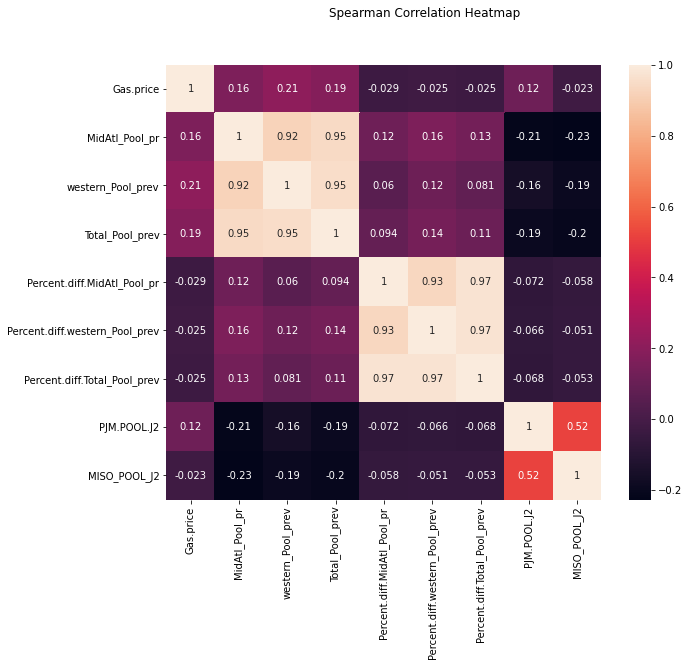

In [0]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(feature.drop(['dates','indice'],axis=1).corr(method='spearman'), square=True, annot=True)
plt.suptitle("Spearman Correlation Heatmap")
plt.show();

## 2.2 Correlation with the target

### 2.2.1 SMECO_RESID_DA

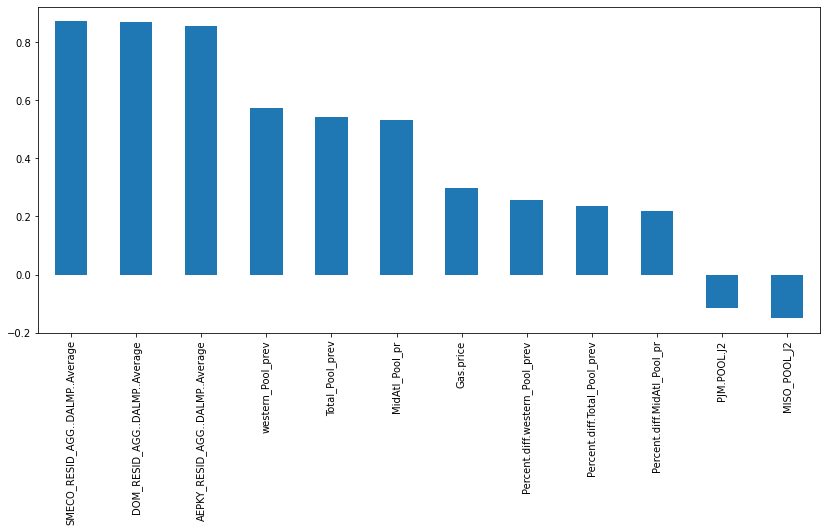

In [0]:
corr_with_price = df.drop(columns=['indice','DOM_RESID_AGG..RTLMP..Average','AEPKY_RESID_AGG..RTLMP..Average' ]).corr(method='spearman')["SMECO_RESID_AGG..RTLMP..Average"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("SMECO_RESID_AGG..RTLMP..Average").plot.bar()
plt.show();

### 2.2.2 DOM_RESID_DA

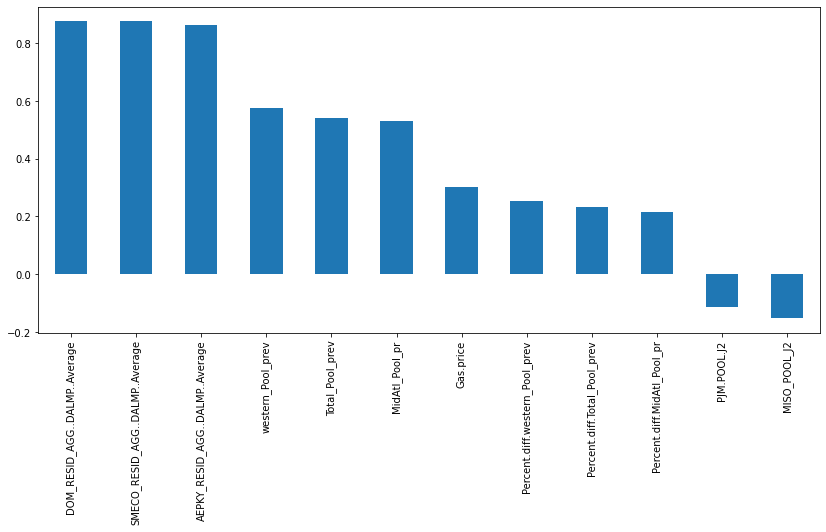

In [0]:
corr_with_price = df.drop(columns=['indice','SMECO_RESID_AGG..RTLMP..Average','AEPKY_RESID_AGG..RTLMP..Average' ]).corr(method='spearman')["DOM_RESID_AGG..RTLMP..Average"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("DOM_RESID_AGG..RTLMP..Average").plot.bar()
plt.show();

### 2.2.3 AEPKY_RESID_DA

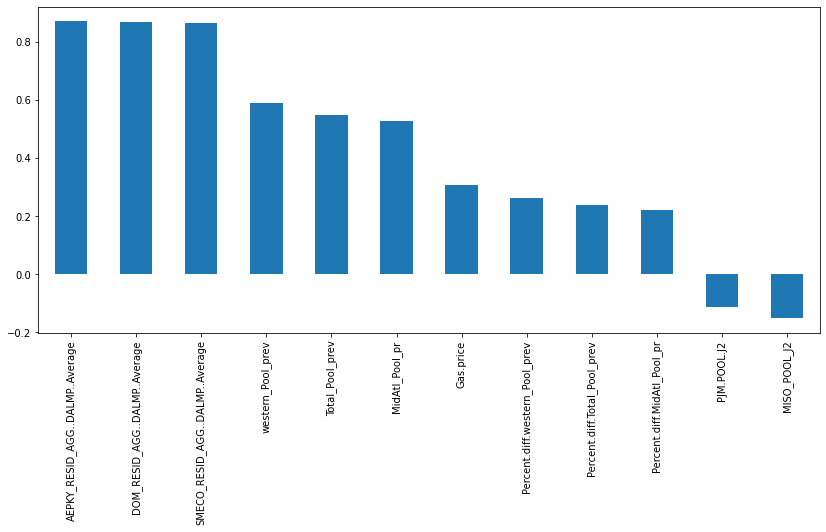

In [0]:
corr_with_price = df.drop(columns=['indice','DOM_RESID_AGG..RTLMP..Average','SMECO_RESID_AGG..RTLMP..Average' ]).corr(method='spearman')["AEPKY_RESID_AGG..RTLMP..Average"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("AEPKY_RESID_AGG..RTLMP..Average").plot.bar()
plt.show();

## 2.3 Plotting the data

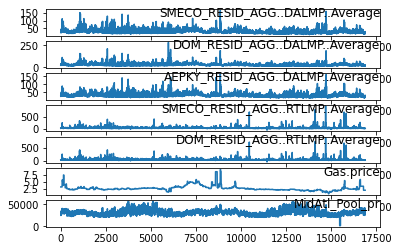

In [0]:
from matplotlib import pyplot
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4,6,7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# 3.Model Training & Performance

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
scaler= MinMaxScaler()

## 3.1 Data preparation

### 3.1.1 Code for data preparation 

In [0]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data,col_names, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
    col_names: comuns names 
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('%s(t-%d)' % (col_names[j], i)) for j in range(n_vars)] #[('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('%s(t)' % (col_names[j])) for j in range(n_vars)] ##[('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names +=[('%s(t+%d)' % (col_names[j], i)) for j in range(n_vars)] ##[('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

### 3.1.2 Features and target 

In [0]:
#set the column we want to predict (demand) to the first columns for consistency
cols = list(df.columns)
#variables=['SMECO_RESID_AGG..DALMP..Average','DOM_RESID_AGG..DALMP..Average', 'AEPKY_RESID_AGG..DALMP..Average']
#cols=map(cols.remove,[2,3,7])
#cols.remove(variables)
#cols.insert(0,variables)
df = df[cols]

values = df.values
# ensure all data is float
#values = values.astype('float32')
# frame as supervised learning
df_lag = series_to_supervised(values,df.columns, 24,24, True)
#df_lag['indice']= df_lag['indice(t)'].astype(int)
df_lag


,SMECO_RESID_AGG..DALMP..Average(t-24),DOM_RESID_AGG..DALMP..Average(t-24),AEPKY_RESID_AGG..DALMP..Average(t-24),SMECO_RESID_AGG..RTLMP..Average(t-24),DOM_RESID_AGG..RTLMP..Average(t-24),AEPKY_RESID_AGG..RTLMP..Average(t-24),Gas.price(t-24),MidAtl_Pool_pr(t-24),western_Pool_prev(t-24),Total_Pool_prev(t-24),Percent.diff.MidAtl_Pool_pr(t-24),Percent.diff.western_Pool_prev(t-24),Percent.diff.Total_Pool_prev(t-24),PJM.POOL.J2(t-24),MISO_POOL_J2(t-24),indice(t-24),SMECO_RESID_AGG..DALMP..Average(t-23),DOM_RESID_AGG..DALMP..Average(t-23),AEPKY_RESID_AGG..DALMP..Average(t-23),SMECO_RESID_AGG..RTLMP..Average(t-23),DOM_RESID_AGG..RTLMP..Average(t-23),AEPKY_RESID_AGG..RTLMP..Average(t-23),Gas.price(t-23),MidAtl_Pool_pr(t-23),western_Pool_prev(t-23),Total_Pool_prev(t-23),Percent.diff.MidAtl_Pool_pr(t-23),Percent.diff.western_Pool_prev(t-23),Percent.diff.Total_Pool_prev(t-23),PJM.POOL.J2(t-23),MISO_POOL_J2(t-23),indice(t-23),SMECO_RESID_AGG..DALMP..Average(t-22),DOM_RESID_AGG..DALMP..Average(t-22),AEPKY_RESID_AGG..DALMP..Average(t-22),SMECO_RESID_AGG..RTLMP..Average(t-22),DOM_RESID_AGG..RTLMP..Average(t-22),AEPKY_RESID_AGG..RTLMP..Average(t-22),Gas.price(t-22),MidAtl_Pool_pr(t-22),...,western_Pool_prev(t+21),Total_Pool_prev(t+21),Percent.diff.MidAtl_Pool_pr(t+21),Percent.diff.western_Pool_prev(t+21),Percent.diff.Total_Pool_prev(t+21),PJM.POOL.J2(t+21),MISO_POOL_J2(t+21),indice(t+21),SMECO_RESID_AGG..DALMP..Average(t+22),DOM_RESID_AGG..DALMP..Average(t+22),AEPKY_RESID_AGG..DALMP..Average(t+22),SMECO_RESID_AGG..RTLMP..Average(t+22),DOM_RESID_AGG..RTLMP..Average(t+22),AEPKY_RESID_AGG..RTLMP..Average(t+22),Gas.price(t+22),MidAtl_Pool_pr(t+22),western_Pool_prev(t+22),Total_Pool_prev(t+22),Percent.diff.MidAtl_Pool_pr(t+22),Percent.diff.western_Pool_prev(t+22),Percent.diff.Total_Pool_prev(t+22),PJM.POOL.J2(t+22),MISO_POOL_J2(t+22),indice(t+22),SMECO_RESID_AGG..DALMP..Average(t+23),DOM_RESID_AGG..DALMP..Average(t+23),AEPKY_RESID_AGG..DALMP..Average(t+23),SMECO_RESID_AGG..RTLMP..Average(t+23),DOM_RESID_AGG..RTLMP..Average(t+23),AEPKY_RESID_AGG..RTLMP..Average(t+23),Gas.price(t+23),MidAtl_Pool_pr(t+23),western_Pool_prev(t+23),Total_Pool_prev(t+23),Percent.diff.MidAtl_Pool_pr(t+23),Percent.diff.western_Pool_prev(t+23),Percent.diff.Total_Pool_prev(t+23),PJM.POOL.J2(t+23),MISO_POOL_J2(t+23),indice(t+23)
24,23.49,23.33,22.60,22.02,21.98,21.98,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,0.0,22.85,22.73,22.17,21.68,21.64,21.66,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1.0,22.27,22.24,21.74,21.13,21.12,21.21,3.100,25135.0,...,57441.0,106084.0,-0.015193,-0.010644,-0.012878,1670.0,2403.0,45.0,32.82,32.64,33.16,30.50,30.59,29.76,3.100,33900.0,55998.0,102752.0,-0.038652,-0.025121,-0.031409,1557.0,2622.0,46.0,29.71,29.64,30.50,24.90,24.90,24.77,3.100,31417.0,53054.0,96532.0,-0.073245,-0.052573,-0.060534,1488.0,2862.0,47.0
25,22.85,22.73,22.17,21.68,21.64,21.66,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1.0,22.27,22.24,21.74,21.13,21.12,21.21,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2.0,22.30,22.28,21.78,21.22,21.23,21.39,3.100,24647.0,...,55998.0,102752.0,-0.038652,-0.025121,-0.031409,1557.0,2622.0,46.0,29.71,29.64,30.50,24.90,24.90,24.77,3.100,31417.0,53054.0,96532.0,-0.073245,-0.052573,-0.060534,1488.0,2862.0,47.0,27.92,27.76,25.13,24.92,24.85,24.70,3.100,29859.0,50486.0,91845.0,-0.049591,-0.048404,-0.048554,1856.0,3664.0,48.0
26,22.27,22.24,21.74,21.13,21.12,21.21,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2.0,22.30,22.28,21.78,21.22,21.23,21.39,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,3.0,22.44,22.43,21.95,21.74,21.77,21.93,3.100,24458.0,...,53054.0,96532.0,-0.073245,-0.052573,-0.060534,1488.0,2862.0,47.0,27.92,27.76,25.13,24.92,24.85,24.70,3.100,29859.0,50486.0,91845.0,-0.049591,-0.048404,-0.048554,1856.0,3664.0,48.0,27.47,27.37,24.42,24.56,24.56,24.42,3.100,28844.0,49

In [0]:
target=['SMECO_RESID_AGG..RTLMP..Average(t)','DOM_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)']
##target=['SMECO_RESID_AGG..RTLMP..Average(t)']
reframed = df_lag.loc[:,df_lag.columns.str.endswith('(t-24)')]
reframed = reframed.loc[:,~reframed.columns.str.endswith('indice(t-24)')]
reframed = reframed.loc[:,~reframed.columns.str.endswith('(t)')]
#reframed['indice(t)']=df_lag['indice(t)']
reframed[target]= df_lag[target]
reframed

,SMECO_RESID_AGG..DALMP..Average(t-24),DOM_RESID_AGG..DALMP..Average(t-24),AEPKY_RESID_AGG..DALMP..Average(t-24),SMECO_RESID_AGG..RTLMP..Average(t-24),DOM_RESID_AGG..RTLMP..Average(t-24),AEPKY_RESID_AGG..RTLMP..Average(t-24),Gas.price(t-24),MidAtl_Pool_pr(t-24),western_Pool_prev(t-24),Total_Pool_prev(t-24),Percent.diff.MidAtl_Pool_pr(t-24),Percent.diff.western_Pool_prev(t-24),Percent.diff.Total_Pool_prev(t-24),PJM.POOL.J2(t-24),MISO_POOL_J2(t-24),SMECO_RESID_AGG..RTLMP..Average(t),DOM_RESID_AGG..RTLMP..Average(t),AEPKY_RESID_AGG..RTLMP..Average(t)
24,23.49,23.33,22.60,22.02,21.98,21.98,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,21.07,20.98,21.13
25,22.85,22.73,22.17,21.68,21.64,21.66,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,21.08,21.00,21.20
26,22.27,22.24,21.74,21.13,21.12,21.21,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,21.36,21.31,21.58
27,22.30,22.28,21.78,21.22,21.23,21.39,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,19.71,19.65,19.90
28,22.44,22.43,21.95,21.74,21.77,21.93,3.100,24458.0,39502.0,72509.0,-0.007668,-0.005463,-0.005664,1460.0,3543.0,20.76,20.69,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,19.31,19.22,19.49,18.19,18.12,18.30,1.935,39454.0,60115.0,113710.0,-0.002225,-0.001180,-0.001151,2260.0,8958.0,18.77,18.80,19.48
16850,17.92,17.83,18.04,18.26,18.21,18.48,1.935,38981.0,59698.0,112525.0,-0.011989,-0.006937,-0.010421,2392.0,9147.0,18.66,18.79,19.48
16851,17.12,16.90,16.99,17.96,17.80,18.06,1.935,37795.0,58329.0,109397.0,-0.030425,-0.022932,-0.027798,2747.0,9337.0,17.94,17.90,18.39
16852,14.60,14.43,14.39,15.75,15.65,15.90,1.935,35704.0,55982.0,104511.0,-0.055325,-0.040237,-0.044663,3102.0,9527.0,17.82,17.74,18.10


In [0]:
 #col=['SMECO_RESID_AGG..DALMP..Average','DOM_RESID_AGG..DALMP..Average']
 #df_lag.loc[:,[~df_lag.columns.str.contains(c) for c in col]]
 #testt= [df_lag.columns.str.contains('DOM_RESID_AGG..DALMP..Average')]
#testt

In [0]:
X, y = np.asarray(reframed.drop(columns=target)), np.asarray(reframed[target])
print(X.shape, y.shape)

(16830, 15) (16830, 3)


In [0]:
X.shape[0]/24
int(0.80*X.shape[0])

13464

In [0]:
# flatten input
n_input = X.shape[1]# * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X.shape

(16830, 15)

In [0]:
# flatten output
n_output =len(target) #y.shape[1]
y = y.reshape((y.shape[0], n_output))
y.shape

(16830, 3)

In [0]:
n_train_hours =int(0.80*X.shape[0])## 500 * 24
X_Train= X[:n_train_hours,]
X_Test= X[n_train_hours:,]
X_Train

array([[ 2.3490000e+01,  2.3330000e+01,  2.2600000e+01, ...,
        -4.8957325e-02,  2.0110000e+03,  4.2580000e+03],
       [ 2.2850000e+01,  2.2730000e+01,  2.2170000e+01, ...,
        -5.0372486e-02,  1.7190000e+03,  4.0400000e+03],
       [ 2.2270000e+01,  2.2240000e+01,  2.1740000e+01, ...,
        -2.9496751e-02,  1.8260000e+03,  3.7470000e+03],
       ...,
       [ 3.5040000e+01,  3.3190000e+01,  3.1450000e+01, ...,
         2.4625386e-02,  2.8900000e+02,  1.3960000e+03],
       [ 4.0170000e+01,  3.7730000e+01,  3.5720000e+01, ...,
         1.4185350e-02,  3.0700000e+02,  1.6500000e+03],
       [ 3.3260000e+01,  3.1870000e+01,  3.0220000e+01, ...,
        -8.0316670e-03,  3.2400000e+02,  2.1690000e+03]])

In [0]:
y_Train= y[:n_train_hours,]
y_Test= y[n_train_hours:,]
y_Train

array([[21.07, 20.98, 21.13],
       [21.08, 21.  , 21.2 ],
       [21.36, 21.31, 21.58],
       ...,
       [33.21, 33.28, 33.  ],
       [37.28, 37.35, 36.83],
       [38.58, 38.59, 37.96]])

In [0]:
Train_Xy=hstack((X_Train, y_Train)) 
Test_Xy=hstack((X_Test, y_Test))
pd.DataFrame(Test_Xy) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,28.93,27.81,26.28,32.52,30.59,28.35,1.660,37708.0,56568.0,109166.0,-0.029270,-0.023292,-0.027630,340.0,2687.0,27.03,27.11,26.92
1,27.88,26.89,25.77,29.23,27.99,26.51,1.660,36606.0,54535.0,105483.0,-0.029225,-0.035939,-0.033738,355.0,3206.0,35.85,36.09,35.95
2,25.57,24.63,23.61,23.89,23.17,22.45,1.660,35364.0,53214.0,102250.0,-0.033929,-0.024223,-0.030649,370.0,3449.0,24.59,24.72,24.79
3,23.05,22.36,21.72,20.99,20.50,20.10,1.660,32866.0,50309.0,95791.0,-0.070637,-0.054591,-0.063169,386.0,3693.0,23.56,23.58,23.59
4,20.49,20.02,19.72,19.68,19.38,19.18,1.660,30150.0,46760.0,88441.0,-0.082639,-0.070544,-0.076730,402.0,3936.0,22.10,22.04,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,19.31,19.22,19.49,18.19,18.12,18.30,1.935,39454.0,60115.0,113710.0,-0.002225,-0.001180,-0.001151,2260.0,8958.0,18.77,18.80,19.48
3362,17.92,17.83,18.04,18.26,18.21,18.48,1.935,38981.0,59698.0,112525.0,-0.011989,-0.006937,-0.010421,2392.0,9147.0,18.66,18.79,19.48
3363,17.12,16.90,16.99,17.96,17.80,18.06,1.935,37795.0,58329.0,109397.0,-0.030425,-0.022932,-0.027798,2747.0,9337.0,17.94,17.90,18.39
3364,14.60,14.43,14.39,15.75,15.65,15.90,1.935,35704.0,55982.0,104511.0,-0.055325,-0.040237,-0.044663,3102.0,9527.0,17.82,17.74,18.10


In [0]:
Train_Xy_scaled= scaler.fit_transform(Train_Xy)
Test_Xy_scaled= scaler.fit_transform(Test_Xy)
Test_Xy_scaled.shape

(3366, 18)

In [0]:
features_train= Train_Xy_scaled[:,:-n_output]
features_test= Test_Xy_scaled[:,:-n_output]
features_train.shape

(13464, 15)

In [0]:
features_train

array([[0.08061358, 0.04533669, 0.07622875, ..., 0.4956122 , 0.25611474,
        0.30033003],
       [0.07643603, 0.0431143 , 0.0733957 , ..., 0.49205747, 0.21872199,
        0.28434177],
       [0.07265013, 0.04129936, 0.07056266, ..., 0.54449504, 0.23242413,
        0.26285295],
       ...,
       [0.15600522, 0.08185792, 0.13453683, ..., 0.68044394, 0.03559995,
        0.09042904],
       [0.18949086, 0.09867398, 0.16266965, ..., 0.65421971, 0.03790498,
        0.10905757],
       [0.14438642, 0.07696866, 0.126433  , ..., 0.59841299, 0.04008196,
        0.14712138]])

In [0]:
label_train= Train_Xy_scaled[:,-n_output:]
label_test= Test_Xy_scaled[:,-n_output:]
label_test.shape

(3366, 3)

### 3.1.3 Individual performance

#### 3.1.3.1 For SMECO

In [0]:
# Code to produce figure 2
print('Lag correlations with SMECO_RESID_AGG..RTLMP..Average at t ')
print(reframed.drop(columns=['DOM_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)']).corr()['SMECO_RESID_AGG..RTLMP..Average(t)'].sort_values(ascending=False)[1:])


Lag correlations with SMECO_RESID_AGG..RTLMP..Average at t 
SMECO_RESID_AGG..DALMP..Average(t-24)    0.369050
AEPKY_RESID_AGG..DALMP..Average(t-24)    0.361063
DOM_RESID_AGG..DALMP..Average(t-24)      0.352861
AEPKY_RESID_AGG..RTLMP..Average(t-24)    0.247322
western_Pool_prev(t-24)                  0.240782
SMECO_RESID_AGG..RTLMP..Average(t-24)    0.238128
DOM_RESID_AGG..RTLMP..Average(t-24)      0.237190
Total_Pool_prev(t-24)                    0.206672
MidAtl_Pool_pr(t-24)                     0.187767
Percent.diff.western_Pool_prev(t-24)     0.125905
Percent.diff.MidAtl_Pool_pr(t-24)        0.121477
Gas.price(t-24)                          0.075546
Percent.diff.Total_Pool_prev(t-24)       0.024904
PJM.POOL.J2(t-24)                       -0.013620
MISO_POOL_J2(t-24)                      -0.046206
Name: SMECO_RESID_AGG..RTLMP..Average(t), dtype: float64


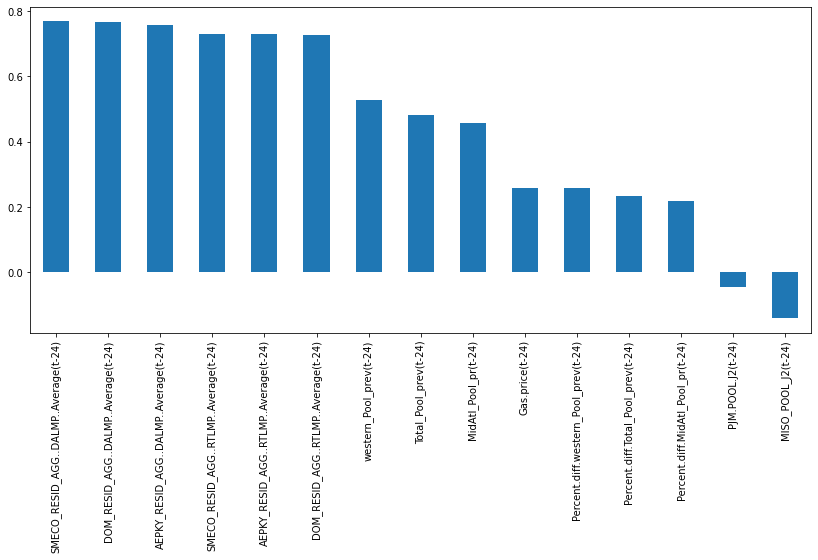

In [0]:
corr_price = reframed.drop(columns=['DOM_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)' ]).corr(method='spearman')["SMECO_RESID_AGG..RTLMP..Average(t)"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_price.drop("SMECO_RESID_AGG..RTLMP..Average(t)").plot.bar()
plt.show();

In [0]:
#Code for indidual regression
import scipy
df1=reframed.drop(columns=['DOM_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)'])
demand_r = {}
col=[]
val=[]
for col in df1.drop(columns=['SMECO_RESID_AGG..RTLMP..Average(t)']).columns:
 #if col != 'SMECO_RESID_AGG..RTLMP..Average(t)':
  slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df1[col], df1['SMECO_RESID_AGG..RTLMP..Average(t)'])
  demand_r[col] = r_value**2
 # print( demand_r[col])




In [0]:
demand_r_df = pd.DataFrame({'col': list(demand_r.keys()), 'r^2': list(demand_r.values())})
print(demand_r_df.sort_values(by='r^2', ascending=False))
#demand_r_df

                                      col       r^2
0   SMECO_RESID_AGG..DALMP..Average(t-24)  0.136198
2   AEPKY_RESID_AGG..DALMP..Average(t-24)  0.130366
1     DOM_RESID_AGG..DALMP..Average(t-24)  0.124511
5   AEPKY_RESID_AGG..RTLMP..Average(t-24)  0.061168
8                 western_Pool_prev(t-24)  0.057976
3   SMECO_RESID_AGG..RTLMP..Average(t-24)  0.056705
4     DOM_RESID_AGG..RTLMP..Average(t-24)  0.056259
9                   Total_Pool_prev(t-24)  0.042713
7                    MidAtl_Pool_pr(t-24)  0.035256
11   Percent.diff.western_Pool_prev(t-24)  0.015852
10      Percent.diff.MidAtl_Pool_pr(t-24)  0.014757
6                         Gas.price(t-24)  0.005707
14                     MISO_POOL_J2(t-24)  0.002135
12     Percent.diff.Total_Pool_prev(t-24)  0.000620
13                      PJM.POOL.J2(t-24)  0.000186


#### 3.1.3.2 For DOM

In [0]:
# Code to produce figure 2
print('Lag correlations with DOM_RESID_AGG..RTLMP..Average(t) ')
print(reframed.drop(columns=['SMECO_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)']).corr()['DOM_RESID_AGG..RTLMP..Average(t)'].sort_values(ascending=False)[1:])

Lag correlations with DOM_RESID_AGG..RTLMP..Average(t) 
SMECO_RESID_AGG..DALMP..Average(t-24)    0.373372
AEPKY_RESID_AGG..DALMP..Average(t-24)    0.368151
DOM_RESID_AGG..DALMP..Average(t-24)      0.362217
AEPKY_RESID_AGG..RTLMP..Average(t-24)    0.252641
DOM_RESID_AGG..RTLMP..Average(t-24)      0.249991
SMECO_RESID_AGG..RTLMP..Average(t-24)    0.239758
western_Pool_prev(t-24)                  0.234545
Total_Pool_prev(t-24)                    0.199720
MidAtl_Pool_pr(t-24)                     0.180160
Percent.diff.western_Pool_prev(t-24)     0.126879
Percent.diff.MidAtl_Pool_pr(t-24)        0.122767
Gas.price(t-24)                          0.071550
Percent.diff.Total_Pool_prev(t-24)       0.025375
PJM.POOL.J2(t-24)                       -0.020893
MISO_POOL_J2(t-24)                      -0.049666
Name: DOM_RESID_AGG..RTLMP..Average(t), dtype: float64


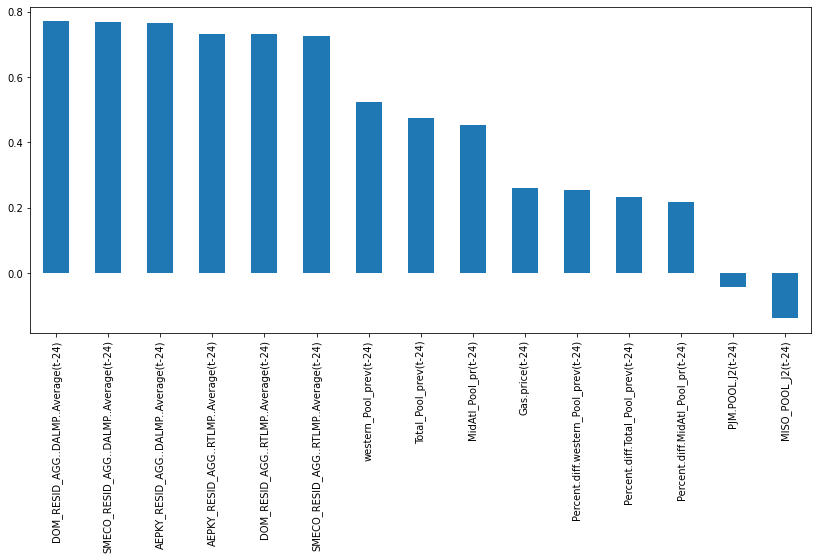

In [0]:
corr_price = reframed.drop(columns=['SMECO_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)' ]).corr(method='spearman')["DOM_RESID_AGG..RTLMP..Average(t)"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_price.drop("DOM_RESID_AGG..RTLMP..Average(t)").plot.bar()
plt.show();

In [0]:
#Code for indidual regression
import scipy
df1=reframed.drop(columns=['SMECO_RESID_AGG..RTLMP..Average(t)','AEPKY_RESID_AGG..RTLMP..Average(t)'])
demand_r = {}
col=[]
val=[]
for col in df1.drop(columns=['DOM_RESID_AGG..RTLMP..Average(t)']).columns:
 #if col != 'SMECO_RESID_AGG..RTLMP..Average(t)':
  slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df1[col], df1['DOM_RESID_AGG..RTLMP..Average(t)'])
  demand_r[col] = r_value**2
 # print( demand_r[col])

In [0]:
demand_r_df = pd.DataFrame({'col': list(demand_r.keys()), 'r^2': list(demand_r.values())})
print(demand_r_df.sort_values(by='r^2', ascending=False))

                                      col       r^2
0   SMECO_RESID_AGG..DALMP..Average(t-24)  0.139407
2   AEPKY_RESID_AGG..DALMP..Average(t-24)  0.135535
1     DOM_RESID_AGG..DALMP..Average(t-24)  0.131201
5   AEPKY_RESID_AGG..RTLMP..Average(t-24)  0.063828
4     DOM_RESID_AGG..RTLMP..Average(t-24)  0.062495
3   SMECO_RESID_AGG..RTLMP..Average(t-24)  0.057484
8                 western_Pool_prev(t-24)  0.055011
9                   Total_Pool_prev(t-24)  0.039888
7                    MidAtl_Pool_pr(t-24)  0.032458
11   Percent.diff.western_Pool_prev(t-24)  0.016098
10      Percent.diff.MidAtl_Pool_pr(t-24)  0.015072
6                         Gas.price(t-24)  0.005119
14                     MISO_POOL_J2(t-24)  0.002467
12     Percent.diff.Total_Pool_prev(t-24)  0.000644
13                      PJM.POOL.J2(t-24)  0.000437


#### 3.1.3.3 For ASEPKY

In [0]:
# Code to produce figure 2
print('Lag correlations with AEPKY_RESID_AGG..RTLMP..Average(t)')
print(reframed.drop(columns=['SMECO_RESID_AGG..RTLMP..Average(t)','DOM_RESID_AGG..RTLMP..Average(t)']).corr()['AEPKY_RESID_AGG..RTLMP..Average(t)'].sort_values(ascending=False)[1:])

Lag correlations with AEPKY_RESID_AGG..RTLMP..Average(t)
AEPKY_RESID_AGG..DALMP..Average(t-24)    0.385205
SMECO_RESID_AGG..DALMP..Average(t-24)    0.369999
DOM_RESID_AGG..DALMP..Average(t-24)      0.355075
AEPKY_RESID_AGG..RTLMP..Average(t-24)    0.316668
DOM_RESID_AGG..RTLMP..Average(t-24)      0.282531
SMECO_RESID_AGG..RTLMP..Average(t-24)    0.281312
western_Pool_prev(t-24)                  0.271690
Total_Pool_prev(t-24)                    0.226834
MidAtl_Pool_pr(t-24)                     0.203883
Percent.diff.western_Pool_prev(t-24)     0.133141
Percent.diff.MidAtl_Pool_pr(t-24)        0.124534
Gas.price(t-24)                          0.071057
Percent.diff.Total_Pool_prev(t-24)       0.026483
PJM.POOL.J2(t-24)                       -0.014339
MISO_POOL_J2(t-24)                      -0.042156
Name: AEPKY_RESID_AGG..RTLMP..Average(t), dtype: float64


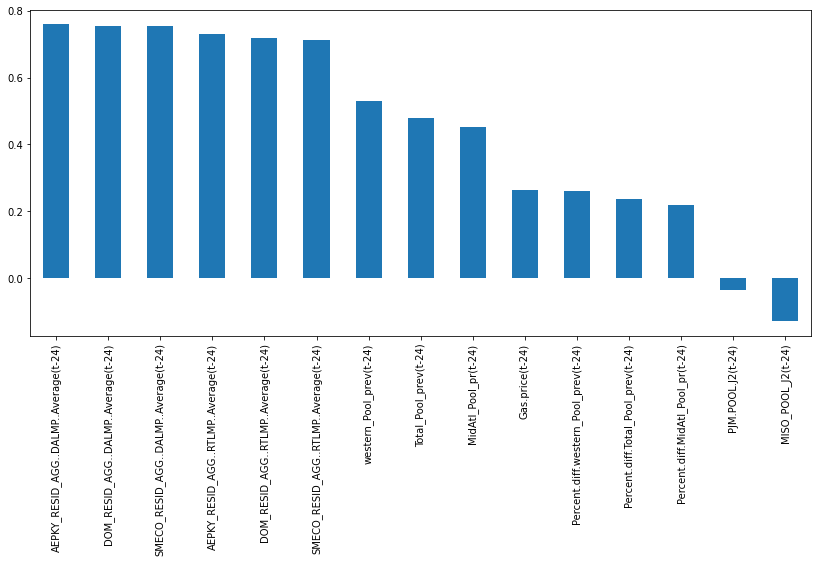

In [0]:
corr_price = reframed.drop(columns=['DOM_RESID_AGG..RTLMP..Average(t)','SMECO_RESID_AGG..RTLMP..Average(t)' ]).corr(method='spearman')["AEPKY_RESID_AGG..RTLMP..Average(t)"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_price.drop("AEPKY_RESID_AGG..RTLMP..Average(t)").plot.bar()
plt.show();

In [0]:
#Code for indidual regression
import scipy
df1=reframed.drop(columns=['SMECO_RESID_AGG..RTLMP..Average(t)','DOM_RESID_AGG..RTLMP..Average(t)'])
demand_r = {}
col=[]
val=[]
for col in df1.drop(columns=['AEPKY_RESID_AGG..RTLMP..Average(t)']).columns:
 #if col != 'SMECO_RESID_AGG..RTLMP..Average(t)':
  slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df1[col], df1['AEPKY_RESID_AGG..RTLMP..Average(t)'])
  demand_r[col] = r_value**2
 # print( demand_r[col])

In [0]:
demand_r_df = pd.DataFrame({'col': list(demand_r.keys()), 'r^2': list(demand_r.values())})
print(demand_r_df.sort_values(by='r^2', ascending=False))

                                      col       r^2
2   AEPKY_RESID_AGG..DALMP..Average(t-24)  0.148383
0   SMECO_RESID_AGG..DALMP..Average(t-24)  0.136899
1     DOM_RESID_AGG..DALMP..Average(t-24)  0.126078
5   AEPKY_RESID_AGG..RTLMP..Average(t-24)  0.100279
4     DOM_RESID_AGG..RTLMP..Average(t-24)  0.079824
3   SMECO_RESID_AGG..RTLMP..Average(t-24)  0.079136
8                 western_Pool_prev(t-24)  0.073815
9                   Total_Pool_prev(t-24)  0.051454
7                    MidAtl_Pool_pr(t-24)  0.041568
11   Percent.diff.western_Pool_prev(t-24)  0.017726
10      Percent.diff.MidAtl_Pool_pr(t-24)  0.015509
6                         Gas.price(t-24)  0.005049
14                     MISO_POOL_J2(t-24)  0.001777
12     Percent.diff.Total_Pool_prev(t-24)  0.000701
13                      PJM.POOL.J2(t-24)  0.000206


## 3.2 Model Training & Testing

### 3.2.1 Code for Model evaluation 

In [0]:
def evaluate(model, X_test, y_test, X_train, y_train, m_name):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Compute and print the metrics
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    print(' ',m_name)
    
    print('---------------------')
    print('Train R^2: %.4f' % r2_train)
    print ('Train Root MSE: %.4f' % rmse_train)

    print ('---------------------')
    print ('Test R^2: %.4f' % r2_test)
    print ('Test Root MSE: %.4f' % rmse_test)

    return r2_test, rmse_test

### 3.2.2 Model Fitting

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

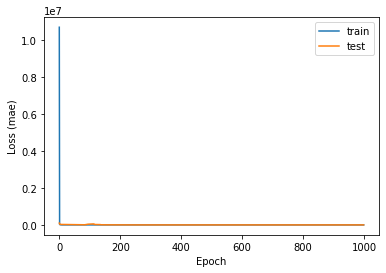

In [0]:
np.random.seed(12430)

nb_neuronnes= 9
model = Sequential()
model.add(Dense(nb_neuronnes, activation='relu', input_dim=n_input))
#model.add(Dense(nb_neuronnes, activation='relu', input_dim=nb_neuronnes))
##model.add(Dense(nb_neuronnes, input_dim=nb_neuronnes))
#model.add(Dense(nb_neuronnes, activation='relu', input_dim=nb_neuronnes))
model.add(Dense(nb_neuronnes, activation='relu', input_dim=nb_neuronnes))
model.add(Dense(nb_neuronnes, input_dim=nb_neuronnes))
model.add(Dense(n_output))
model.compile(optimizer='Adam', loss='mean_squared_error') # mean_squared_error mean_absolute_error

#model.compile(loss='mean_squared_error', optimizer='RMSprop') #sgd Adadelta RMSprop; selection: epochs=30, Adam, batch=32
# fit network
##history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=0, shuffle=False)

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=1000)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history=model.fit(X_Train, y_Train, epochs=1000, verbose=0, shuffle=False, validation_data=(X_Test, y_Test), callbacks=[es, mc])
###history=model.fit(features_train, label_train, epochs=500, verbose=0, shuffle=False, validation_data=(features_test, label_test), callbacks=[es, mc])
#history=model.fit(X_Train, y_Train, epochs=100, verbose=0, shuffle=False, validation_data=(X_Test, y_Test))
##history = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss (mae)')
plt.legend()

### 3.2.3 Training performance

In [0]:
label_train_scaled= model.predict(X_Train)
##label_train_scaled= model.predict(features_train)
##train_array=hstack((features_train,label_train_scaled))
##label_train_pred=scaler.inverse_transform(train_array)[:,-n_output:]
##label_train_pred=pd.DataFrame(label_train_pred)
label_train_pred=pd.DataFrame(label_train_scaled)
label_train_pred

,0,1,2
0,20.895826,20.244806,20.297979
1,20.420654,19.747139,19.806499
2,20.124371,19.436829,19.500046
3,19.997211,19.303652,19.368526
4,20.020195,19.327726,19.392300
...,...,...,...
13459,25.679480,25.254896,25.245790
13460,26.957745,26.593672,26.567924
13461,27.890245,27.570312,27.532425
13462,30.199131,29.988493,29.920546


In [0]:
y_Train

array([[21.07, 20.98, 21.13],
       [21.08, 21.  , 21.2 ],
       [21.36, 21.31, 21.58],
       ...,
       [33.21, 33.28, 33.  ],
       [37.28, 37.35, 36.83],
       [38.58, 38.59, 37.96]])

In [0]:
rsq = r2_score(label_train_pred, y_Train)
rmse = np.sqrt(mean_squared_error(label_train_pred, y_Train))
mae= mean_absolute_error(label_train_pred, y_Train)
print('Training r^2: %.5f' % rsq)
print('Training RMSE: %.5f' % rmse)
print('Training MAE: %.5f' % mae)

Training r^2: -8.02976
Training RMSE: 19.63123
Training MAE: 7.84379


In [0]:
YY_Train=pd.DataFrame(y_Train)
YY_Train

,0,1,2
0,21.07,20.98,21.13
1,21.08,21.00,21.20
2,21.36,21.31,21.58
3,19.71,19.65,19.90
4,20.76,20.69,21.00
...,...,...,...
13459,31.59,31.33,30.78
13460,32.73,33.09,33.32
13461,33.21,33.28,33.00
13462,37.28,37.35,36.83


In [0]:
data_train=pd.DataFrame()
data_train['predicted prices ($/MW)']= label_train_pred.iloc[:,0][:-1]
data_train['Real prices ($/MW)']= YY_Train.iloc[:,0][:-1]
data_train

,predicted prices ($/MW),Real prices ($/MW)
0,20.895826,21.07
1,20.420654,21.08
2,20.124371,21.36
3,19.997211,19.71
4,20.020195,20.76
...,...,...
13458,24.465597,27.62
13459,25.679480,31.59
13460,26.957745,32.73
13461,27.890245,33.21


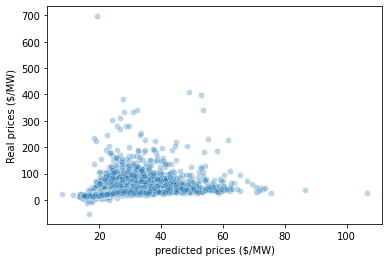

In [0]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="predicted prices ($/MW)", y="Real prices ($/MW)",
    ##hue="features",
    ##palette=sns.color_palette("hls", 10),
    data=data_train,
    legend="full",
    alpha=0.3
)

In [0]:
label_x=np.arange(0, len(features_train))

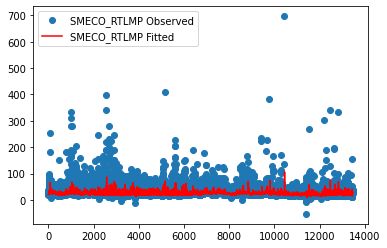

In [0]:
plt.plot(label_x, y_Train[:,0], 'o', label='SMECO_RTLMP Observed')
plt.plot(label_x, label_train_pred.iloc[:,0], 'r', label='SMECO_RTLMP Fitted')
plt.legend()
plt.show()

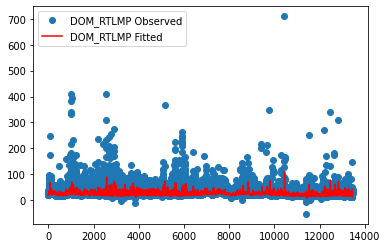

In [0]:
plt.plot(label_x, y_Train[:,1], 'o', label='DOM_RTLMP Observed')
plt.plot(label_x, label_train_pred.iloc[:,1], 'r', label='DOM_RTLMP Fitted')
plt.legend()
plt.show()

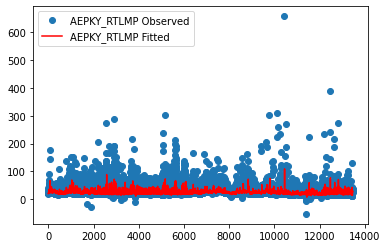

In [0]:
plt.plot(label_x, y_Train[:,2], 'o', label='AEPKY_RTLMP Observed')
plt.plot(label_x, label_train_pred.iloc[:,2], 'r', label='AEPKY_RTLMP Fitted')
plt.legend()
plt.show()

### 3.2.4 Testing performance

In [0]:

label_pred_scaled= model.predict(X_Test)
##label_pred_scaled= model.predict(features_test)
##pred_array=hstack((features_test,label_pred_scaled))
##label_pred=scaler.inverse_transform(pred_array)[:,-n_output:]
#label_pred=pd.DataFrame(label_pred)
label_pred= pd.DataFrame(label_pred_scaled)
label_pred
#pd.DataFrame(label_pred)

,0,1,2
0,26.571495,26.189137,26.168415
1,25.362820,24.923250,24.918266
2,23.942797,23.436007,23.449511
3,22.310631,21.726583,21.761335
4,20.684038,20.022993,20.078924
...,...,...,...
3361,23.688992,23.170187,23.186996
3362,23.293528,22.756004,22.777964
3363,22.733896,22.169880,22.199123
3364,21.405767,20.778887,20.825420


In [0]:
np.asarray(label_pred)[:-1]

array([[26.571495, 26.189137, 26.168415],
       [25.36282 , 24.92325 , 24.918266],
       [23.942797, 23.436007, 23.44951 ],
       ...,
       [23.293528, 22.756004, 22.777964],
       [22.733896, 22.16988 , 22.199123],
       [21.405767, 20.778887, 20.82542 ]], dtype=float32)

In [0]:
y_Test[:-1]

array([[27.03, 27.11, 26.92],
       [35.85, 36.09, 35.95],
       [24.59, 24.72, 24.79],
       ...,
       [18.66, 18.79, 19.48],
       [17.94, 17.9 , 18.39],
       [17.82, 17.74, 18.1 ]])

In [0]:
rsq = r2_score(np.asarray(label_pred)[:-1], y_Test[:-1])
rmse = np.sqrt(mean_squared_error(np.asarray(label_pred)[:-1], y_Test[:-1]))
mae= mean_absolute_error(np.asarray(label_pred)[:-1], y_Test[:-1])
print('Test r^2: %.5f' % rsq)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

Test r^2: -11.58733
Test RMSE: 35.37048
Test MAE: 7.96843


In [0]:
label_x_test=np.arange(0, len(y_Test))

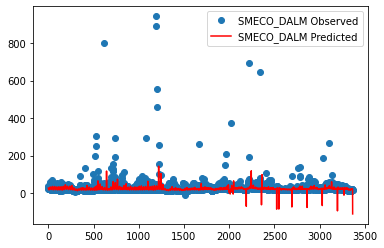

In [0]:
plt.plot(label_x_test, y_Test[:,0], 'o', label='SMECO_DALM Observed')
plt.plot(label_x_test, label_pred.iloc[:,0], 'r', label='SMECO_DALM Predicted')
plt.legend()
plt.show()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
label_pred.iloc[:,0][:-1]

0       26.571495
1       25.362820
2       23.942797
3       22.310631
4       20.684038
          ...    
3360    23.812353
3361    23.688992
3362    23.293528
3363    22.733896
3364    21.405767
Name: 0, Length: 3365, dtype: float32

In [0]:
YY_Test=pd.DataFrame(y_Test)
YY_Test

,0,1,2
0,27.03,27.11,26.92
1,35.85,36.09,35.95
2,24.59,24.72,24.79
3,23.56,23.58,23.59
4,22.10,22.04,21.78
...,...,...,...
3361,18.77,18.80,19.48
3362,18.66,18.79,19.48
3363,17.94,17.90,18.39
3364,17.82,17.74,18.10


In [0]:
#data_test=pd.DataFrame(hstack((array(label_pred.iloc[:,0]),array(y_Test[:,0]))), columns=['predicted prices ($/MW)', 'Real prices ($/MW)'])
data_test=pd.DataFrame()
data_test['predicted prices ($/MW)']= label_pred.iloc[:,0][:-1]
data_test['Real prices ($/MW)']= YY_Test.iloc[:,0][:-1]
data_test

,predicted prices ($/MW),Real prices ($/MW)
0,26.571495,27.03
1,25.362820,35.85
2,23.942797,24.59
3,22.310631,23.56
4,20.684038,22.10
...,...,...
3360,23.812353,19.03
3361,23.688992,18.77
3362,23.293528,18.66
3363,22.733896,17.94


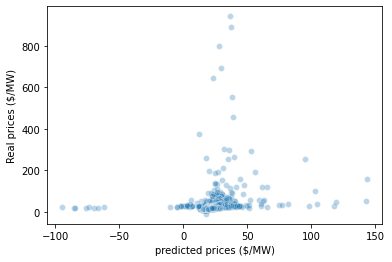

In [0]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="predicted prices ($/MW)", y="Real prices ($/MW)",
    ##hue="features",
    ##palette=sns.color_palette("hls", 10),
    data=data_test,
    legend="full",
    alpha=0.3
)

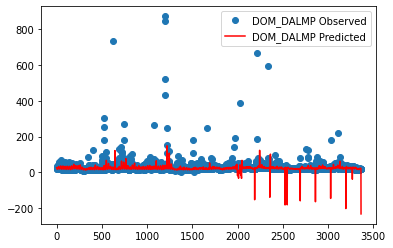

In [0]:
plt.plot(label_x_test, y_Test[:,1], 'o', label='DOM_DALMP Observed')
plt.plot(label_x_test, label_pred.iloc[:,1], 'r', label='DOM_DALMP Predicted')
plt.legend()
plt.show()

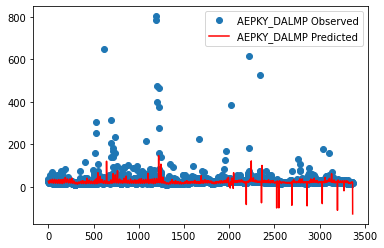

In [0]:
plt.plot(label_x_test, y_Test[:,2], 'o', label='AEPKY_DALMP Observed')
plt.plot(label_x_test, label_pred.iloc[:,2], 'r', label='AEPKY_DALMP Predicted')
plt.legend()
plt.show()